<img src="../images/UBRA_Logo_DATA_TRAIN.png" style="width: 800px;">

# Xarray

"Python package that makes working with labelled multi-dimensional arrays simple, efficient, and fun!". It's like pandas but for netCDF.

[xarray website](http://xarray.pydata.org/en/stable/)

In [188]:
%matplotlib inline
import matplotlib.pylab as plt
import xarray 
import pandas as pd
import numpy as np
from matplotlib import cm
# import seaborn as sns

Open netCDF file:

In [189]:
f = xarray.open_dataset('../data/air.2m.gauss.2021.nc')

In [190]:
f

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, nbnds: 2, time: 196)
Coordinates:
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-07-15
Dimensions without coordinates: nbnds
Data variables:
    air        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2017/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [100]:
f.air

<xarray.DataArray 'air' (time: 196, lat: 94, lon: 192)>
[3537408 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-07-15
Attributes:
    long_name:     mean Daily Air temperature at 2 m
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NCEP Reanalysis Daily Averages
    level_desc:    2 m
    statistic:     Mean
    parent_stat:   Individual Obs
    valid_range:   [150. 400.]
    actual_range:  [178.1   317.025]

In [101]:
f.air.values = (f.air-273.15).values

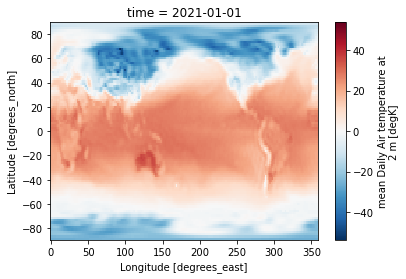

In [102]:
f.air[0,:,:].plot()

You don't have select data from the array by hand

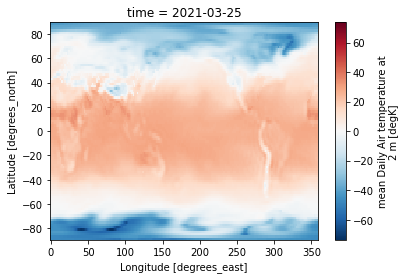

In [103]:
f.air.sel(time='2021-03-25').plot()

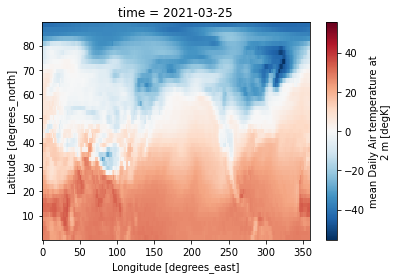

In [104]:
f.air.sel(time='2021-03-25', lon=slice(0,360), lat=slice(90,0)).plot()

In [105]:
f.air.sel(time=slice('2021-03-1','2021-03-31'), lon=slice(0,360), lat=slice(90,0))

<xarray.DataArray 'air' (time: 31, lat: 47, lon: 192)>
array([[[-33.225006, -33.449997, -33.649994, ..., -32.299988,
         -32.550003, -32.850006],
        [-33.22499 , -33.34999 , -33.475006, ..., -32.475006,
         -32.774994, -33.      ],
        [-30.59999 , -30.574997, -30.549988, ..., -30.549988,
         -30.574997, -30.59999 ],
        ...,
        [ 27.875   ,  28.425018,  28.399994, ...,  26.024994,
          26.37503 ,  26.975006],
        [ 27.350006,  27.375   ,  27.175018, ...,  27.774994,
          27.50003 ,  27.199982],
        [ 27.700012,  27.774994,  27.575012, ...,  27.774994,
          27.700012,  27.550018]],

       [[-34.949997, -35.049988, -35.125   , ..., -34.44998 ,
         -34.625   , -34.799988],
        [-37.02498 , -37.100006, -37.125   , ..., -36.725006,
         -36.799988, -36.924988],
        [-34.649994, -34.675003, -34.72499 , ..., -34.72499 ,
         -34.649994, -34.625   ],
...
        [ 27.375   ,  28.175018,  28.175018, ...,  27.00003 ,
          27.25    ,  26.924988],
        [ 27.800018,  28.100006,  27.975006, ...,  28.075012,
          27.899994,  27.600006],
        [ 28.100006,  28.049988,  27.850006, ...,  27.825012,
          27.774994,  27.875   ]],

       [[-19.149994, -19.274994, -19.349976, ..., -18.949997,
         -19.024994, -19.074982],
        [-16.75    , -16.674988, -16.674988, ..., -17.      ,
         -16.924988, -16.824982],
        [-14.125   , -13.899994, -13.625   , ..., -15.324982,
         -14.774994, -14.399994],
        ...,
        [ 27.575012,  28.450012,  28.475006, ...,  27.424988,
          27.375   ,  27.050018],
        [ 27.850006,  28.150024,  27.925018, ...,  28.25    ,
          27.824982,  27.549988],
        [ 28.375   ,  28.37503 ,  28.175018, ...,  27.825012,
          27.875   ,  28.075012]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... 6.667 4.762 2.857 0.9524
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 2021-03-01 2021-03-02 ... 2021-03-31
Attributes:
    long_name:     mean Daily Air temperature at 2 m
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NCEP Reanalysis Daily Averages
    level_desc:    2 m
    statistic:     Mean
    parent_stat:   Individual Obs
    valid_range:   [150. 400.]
    actual_range:  [178.1   317.025]

In [106]:
march_mean = f.air.sel(time=slice('2021-03-1','2021-03-31'), lon=slice(0,360), lat=slice(90,0)).mean(dim='time')

In [107]:
march_mean

<xarray.DataArray 'air' (lat: 47, lon: 192)>
array([[-32.696774, -32.768543, -32.81532 , ..., -32.52983 , -32.57338 ,
        -32.639515],
       [-31.257254, -31.308054, -31.362085, ..., -31.116125, -31.162895,
        -31.204838],
       [-29.616125, -29.349188, -29.08467 , ..., -30.399185, -30.136286,
        -29.879025],
       ...,
       [ 27.775003,  28.322582,  28.229048, ...,  26.913713,  27.225815,
         27.188717],
       [ 28.192745,  28.200006,  27.852428, ...,  28.388718,  28.260487,
         27.959682],
       [ 28.180649,  28.165323,  27.816946, ...,  27.882265,  27.804033,
         27.809687]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... 6.667 4.762 2.857 0.9524
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

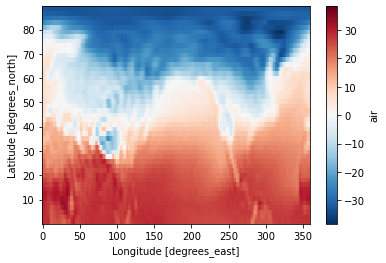

In [108]:
march_mean.plot()

## Exersise

- Plot standard deviation of atmospheric temperature for march 2021

## Time series from the data

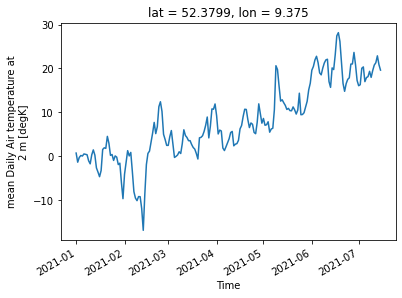

In [177]:
f.air.sel(lon=8.8, lat=53.083333, method='nearest', tolerance=5).plot()

## Exersise

- compare temperatures for Bremen that you get from reanalysis data and those you get from meteo station ([KNMI Climatological Service](http://climexp.knmi.nl/selectdailyseries.cgi?id))

### Hints:

- the file with average temperatures is already doanloaded and located at `data/Bremen_average.txt`
- data from `xarray` can be easilly converted to `pandas` using `.to_pandas()` method
- best aproach is to create two separate variables with observational and reanalysis data and combine them
- If indexes coinside, one can copy data to pandas object with:
    data['other_data'] = data2

At the end you should get something like this:

<img src="../images/bremen_comparison.png" style="width: 400px;">


You can try to do it for another location.

## MRI example

In [109]:
mri = xarray.open_dataset('../data/mri.nc')

In [110]:
mri

<xarray.Dataset>
Dimensions:  (x: 256, y: 256, z: 99)
Coordinates:
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 247 248 249 250 251 252 253 254 255
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 247 248 249 250 251 252 253 254 255
  * z        (z) int64 0 1 2 3 4 5 6 7 8 9 10 ... 89 90 91 92 93 94 95 96 97 98
Data variables:
    MR       (x, y, z) uint8 ...

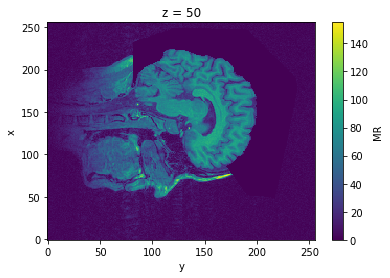

In [111]:
mri.MR[:,:,50].plot()

In [112]:
mri = mri.transpose('z','y','x')
mri

<xarray.Dataset>
Dimensions:  (x: 256, y: 256, z: 99)
Coordinates:
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 247 248 249 250 251 252 253 254 255
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 247 248 249 250 251 252 253 254 255
  * z        (z) int64 0 1 2 3 4 5 6 7 8 9 10 ... 89 90 91 92 93 94 95 96 97 98
Data variables:
    MR       (z, y, x) uint8 ...

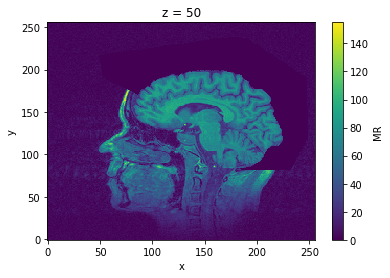

In [113]:
mri.MR[50,:,:].plot()

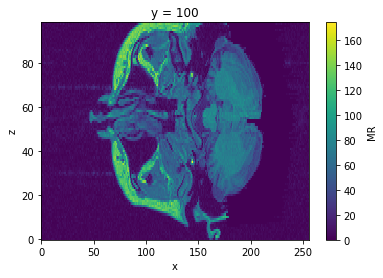

In [114]:
mri.MR[:,100,:].plot()

In the [data sescription](https://graphics.stanford.edu/data/voldata/) is stated that `X:Y:Z aspect ratio of each voxel is 1:1:2`, so we can change z coordinate values.

In [117]:
mri = mri.assign_coords(z=list(range(0,98*2+2,2)))

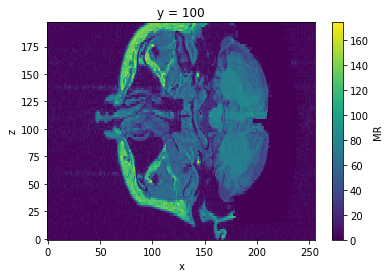

In [118]:
mri.MR[:,100,:].plot()

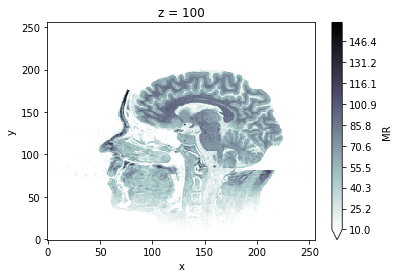

In [132]:
mri.MR[50,:,:].plot(cmap=plt.cm.bone_r, levels=np.linspace(10,160,100))

## Exersise

- Experiment with MRI image, find interesting slice (any plane), interesting colormap and maybe range. Use [xarray plotting documentation](http://xarray.pydata.org/en/stable/user-guide/plotting.html) and [matplotlib colormap reference](https://matplotlib.org/stable/gallery/color/colormap_reference.html)
- Do the same for air tempature data.